# Logistic Regression 
#### classification algorithm used to predict probabilities of categorical outcomes.

## What is Logistic Regression?
Logistic Regression is a supervised machine learning algorithm used for **binary classification** problems.

Examples:
- Spam vs Not Spam
- Pass vs Fail
- Disease vs No Disease

It predicts probability using the **sigmoid function**.

#### Import Libraries

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#### let’s create a simple dataset: "Hours Studied vs. Exam Pass/Fail."
**Goal:**  
To build a Logistic Regression model that predicts whether a student will pass or fail based on the number of hours studied.

In [47]:
# Data: [Hours Studied]
X = np.array([[0.5], [0.75], [1.0], [1.25], [1.5], [1.75], [2.0], [2.25], [2.5], 
              [2.75], [3.0], [3.25], [3.5], [4.0], [4.25], [4.5], [4.75], [5.0]])

# Target: [0 = Fail, 1 = Pass]
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

### Step 1: Convert Data into DataFrame

We convert the NumPy arrays into a pandas DataFrame for better readability and easier data analysis.

In [48]:
df = pd.DataFrame({
    "Hours_Studied": X.flatten(),
    "Pass": y
})

df.head()

,Hours_Studied,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0


### Step 2: Data Visualization

We visualize the relationship between hours studied and exam result using a scatter plot.

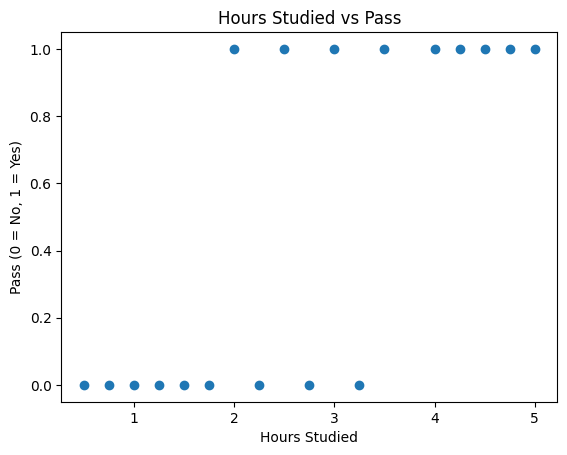

In [49]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel("Hours Studied")
plt.ylabel("Pass (0 = No, 1 = Yes)")
plt.title("Hours Studied vs Pass")
plt.show()

### Step 3: Train-Test Split

We split the dataset into training and testing sets to evaluate how well the model performs on unseen data.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

**Split Data**

75% → train

25% → test

### Step 4: Train Logistic Regression Model

We train the Logistic Regression model using the training data so it can learn the relationship between study hours and exam results.

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### Step 5: Make Predictions

We use the trained Logistic Regression model to make predictions on the test data.

In [52]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0])

### Step 6: Evaluate the Model

We evaluate the model to check how well it performs on unseen test data.

#### Model Accuracy

Accuracy shows the percentage of correct predictions made by the model.

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


#### Accuracy Interpretation

The model achieved an accuracy of **0.80**, which means it correctly predicted 80% of the test samples.

However, accuracy alone may be misleading, especially when the dataset is imbalanced.

#### Confusion Matrix

The confusion matrix helps us understand how many predictions were correct and incorrect.

In [54]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[4 0]
 [1 0]]


#### Confusion Matrix Interpretation

From the confusion matrix:

- The model correctly predicted **4 failures (True Negatives)**.
- The model failed to correctly identify the **1 passing case (False Negative)**.

This indicates the model is biased toward predicting failures.

#### Classification Report

The classification report provides precision, recall, and F1-score for deeper performance analysis.

In [55]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



c:\Users\shush\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shush\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\shush\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

#### Classification Report Interpretation

- The model performs well for class **0 (Fail)**.
- The model performs poorly for class **1 (Pass)** with zero recall and precision.
- This suggests the model is not effectively learning to identify passing students.

Improvement can be done using more balanced data or more training samples.

**Note:** The small dataset size may be affecting the model performance.

### Step 7: Custom Prediction

Use the trained model to predict the outcome for a new unseen input.

In [56]:

hours = [[3.2]]

prediction = model.predict(hours)
probability = model.predict_proba(hours)

print("Prediction (0=Fail, 1=Pass):", prediction[0])
print("Probability of Passing:", probability[0][1])

Prediction (0=Fail, 1=Pass): 1
Probability of Passing: 0.650956150964726


#### Custom Prediction Interpretation

For a student studying **3.2 hours**, the model predicts **Pass (1)** with a probability of approximately **0.65**.

This indicates the model believes the student is more likely to pass than fail.